## **Employee Attrition Problem:**

The key to success in any organization is attracting and retaining top talent. One of the key tasks is to determine which factors keep employees at a company and which prompt others to leave. We need to know what factors we can change to prevent the loss of good people.

Description of few variables:

1. **Education**
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

2. **EnvironmentSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

3. **JobInvolvement**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

4. **JobSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

5. **PerformanceRating**
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

6. **RelationshipSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

7. **WorkLifeBalance**
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **# Importing Python Libraries**

In [ ]:
#Importing Packages/Libraries
##from google.colab import files
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import matplotlib.pylab as pylab
import warnings
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Choosing the file to upload from local
##upload = files.upload()

# **Importing Dataset and Performing Descriptive Statistics**


In [ ]:
#Importing Train dataset into Colab
Train = pd.read_csv("/kaggle/input/employee-attrition/employee_attrition_train.csv")

Test= pd.read_csv("/kaggle/input/employee-attrition/employee_attrition_test.csv")

In [ ]:
#!pip install pandas-profiling==2.8.0

In [ ]:
#Panda Profiling gives almost all the data analysis required for the EDA
pandas_profiling.ProfileReport(Train)

In [ ]:
#For setting the charts size globally
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.title_fontsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
#First few rows of the dataframe
Train.head()

In [ ]:
#Last few rows of the dataframe
Train.tail()

In [ ]:
#checking the shape of the dataset
row, col = Train.shape
print('There are total of {}'.format(row),'rows and {}'.format(col),'columns in the dataset')

In [ ]:
#checking column names of the dataframe
Train.columns

In [ ]:
# Mean and Median are almost same
Train.describe(include = 'all').T

**Observation:**
For continous variables 'unique' is updated as NaN, for categorical variables, the number of unique values are updated along with the most frequent value with the # of times. 
There is a possibility for outliers presence in monthly income and monthly rate fields. However, we need to confirm with the boxplots

# **Univariate Analysis:**

Here we study the behaviour of each column, their distributions, detect outliers, missing values, skewness and plotting them

In [ ]:
#How many unique values are present in each column
features=Train.columns
print("Number of unique values are as below:\n")
for i in features:
  uniqueValues=Train[i].nunique()
  print(i,uniqueValues)

**Observation:**

Below columns are not useful be cause they are having single unique value which does not give any useful information for prediction. Hence they can be dropped

1. EmployeeCount
2. Over18
3. StandardHours
4. EmployeeNumber

# ***Dropping variables***

In [ ]:
#dropping unuseful columns
Train.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True,axis=1)

In [ ]:
#To check the datatypes of the variables
Train.info()

**Observation:**

We see there is presence of null values in below 5 columns
1. Age - Continous variable
2. Business travel - Categorical variable
3. Daily rate - Continous variable
4. Distance From home - Continous variable
5. Marital status - Categorical variable

In [ ]:
#Visualize the null values
sns.heatmap(Train.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title("Heat map plotting the missing values in the columns")
plt.show()

In [ ]:
# Number of of null values in each column
data=round(Train.isnull().sum(),2)
nullValueCols=pd.DataFrame(data,columns=['Missing Values Count'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Values Count']!=0]

In [ ]:
# percentage of null values in columns which have null values.
data=round((Train.isnull().sum()/Train.shape[0])*100,2)
nullValueCols=pd.DataFrame(data,columns=['Missing Value %'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Value %']!=0]

**Observation:**

Missing Values below 10% can be dropped. But if they are important columns, they must be imputed. Also, we have to make sure that overall, there should not be major loss of information due to dropping of missing values

In [ ]:
# No duplicates.
Train.duplicated().sum()

**Observation:**

No Duplicates are found in the data

In [ ]:
#plotting target variable (Attrition)
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'Attrition', data = Train)
plt.title("Countplot for Attrition Column")
plt.show()

In [ ]:
# Attrition is the Y variable, relative frequencies of the dependent variable. Imbalance dataset.
Train.Attrition.value_counts(normalize = True)

**Observation:**

Data dataset is highly Imbalanced wrt to Attrition column

In [ ]:
#Separating Numeric data and checking the column names
NumericData=Train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

In [ ]:
#melting the dataframe to bring the data into single column for FacetGrid
NumericDataMelt=NumericData.melt()
NumericDataMelt.head()

In [ ]:
#Univariate Analysis Plotting Distribution plot for Numeric Variables
fg = sns.FacetGrid(NumericDataMelt, col='variable',sharex=False, sharey=False, size=4,col_wrap=5)
fg.map(sns.distplot,'value')
plt.show()

**Observations:**

**Below variables though they are Numeric data type, but as per Business they are Categorical in nature.** 

Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, Stock OptionLevel, WorkLifeBalance, 

**Below variables are of Numeric Data type:**

Age, DailyRate, DistanceFromHome, HourlyRate, Montly Income, MonthlyRate, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear,NumberOfCompaniesWorked

**Skew Details:**

**Normally/Close to distributed: **Age, DailyRate, HourlyRate, MonthlyRate


**Right Skewed/Positive Skew:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

In [ ]:
NewNumeric=Train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

We see there are outliers in below columns
1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked

**Skew Details:**

**Normally/Close to distributed: **Age, DailyRate, HourlyRate, MonthlyRate


**Right Skewed/Positive Skew:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Columns which are skewed are not having uniform distribution of the data accross the quantiles

In [ ]:
#Boxplot for Daily and Hourly Rate
NewNumeric=Train[['DailyRate','HourlyRate']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Daily and Hourly Rate")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There are no outliers in DailyRate and HourlyRate

In [ ]:
#Boxplot for MonthlyIncome and MonthlyRate
NewNumeric=Train[['MonthlyRate','MonthlyIncome']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for MonthlyIncome and MonthlyRate")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Observation:**

There are Outliers in MonthlyIncome


# **Overall Observations of Numeric Univariate Analysis:**

**Outliers columns are found:**

1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked
8. MonthlyIncome

**Columns Dropped:**
1. EmployeeCount
2. EmployeeNumber
3. Over18
4. StandardHours

**Distributions of columns:**

**Normally distributed:** Age, DailyRate, HourlyRate, MonthlyRate,

**Right Skewed:**DistanceFromHome, MonthlyIncome,PercentSalaryHike, YearsSinceLastPromotion,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager


# **Numeric Bivariate Analysis**

In [ ]:
#Attrition vs Numeric Variables
#Creating variable for holding the Numeric data into a DataFrame
NumericVariables=Train[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
#Creating NumericBV variable for concatinating with Attrition Column for Bivariate Analysis
NumericBV=NumericVariables
NumericBV['Attrition']=Train['Attrition']

In [ ]:
#Bivariate Analysis for actual categorical Variables with Attrition
NumericBVData = NumericBV.melt(id_vars=['Attrition'])
NumericDataGD = sns.FacetGrid(NumericBVData, col='variable',sharex=False,sharey=False,dropna=True,size=5,col_wrap=5,  hue='Attrition' )
histPlot=NumericDataGD.map(sns.kdeplot,'value' )
NumericDataGD.add_legend()
plt.show()

**Observations:**

We notice below factors are are contributing to Attrition

1. Employees of Age below 30 (approx) 
2. Employees whose MonthlyIncome is less than 5000 (approx) 
3. Employees whose TotalWorkingYears below 10 years (approx) 
4. YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager below 5 years (approx) 

In [ ]:
NewNumeric=Train[['Age','DistanceFromHome','PercentSalaryHike','TotalWorkingYears']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation:**

1. Percent SalaryHike and DistanceFromHome are not contributing to Attrition

2. Age below 30 and TotalWorkingYears below 5 are contributing to Attrition.

In [ ]:
NewNumeric=Train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsSinceLastPromotion','TrainingTimesLastYear','NumCompaniesWorked']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
bp.set_xticklabels(bp.get_xticklabels(),rotation=20)
plt.show()

**Observations:**

1. YearsSinceLastPromotion and TrainingTimesLastYear are not contributing much to decide the Attrition rate
2. Those employees whose avg years with current manager and yearsInCurrentRole is below 3 years are contributing to Attrition.
3. Employees whose NumCompaniesWorked 1-4 years are contributing to attrition

In [ ]:
NewNumeric=Train[['DailyRate','HourlyRate']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation**

1. Hourly rate is not contributing much to decide attrition factor
2. Althought DailyRate is also not contributing much, the average dailyrate value is less for employees who are contributing to attrition

In [ ]:
NewNumeric=Train[['MonthlyRate','MonthlyIncome']]
NewNumeric['Attrition']=Train['Attrition']
NumericBVData = NewNumeric.melt(id_vars=['Attrition'])
plt.figure(figsize=(10,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NumericBVData,hue='Attrition')
plt.show()

**Observation:**

MonthlyRate is not useful to decide the attrition. However, the average income of employees who are contributing to attrition rate is very low 

In [ ]:
#Bivariate Analysis Correlation plot with the final Numeric variables
NewNumeric=Train[['Age','HourlyRate','MonthlyRate','MonthlyIncome','YearsSinceLastPromotion',
                  'TrainingTimesLastYear','NumCompaniesWorked','DailyRate','DistanceFromHome',
                  'PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                  'YearsWithCurrManager']]
plt.figure(figsize=(15,15))
sns.heatmap(round(NewNumeric.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

**Observations:**

**Inferences from Correlation plot**
1. By analysising the below correlations between variables, we can infer that:

1. As age increases the workingYears(experience) increases.
2. Monthly Income is directly proportional to Job level. Employees at Higher position gets more income.
3. As the TotalWorkingYears increases, employee gets promoted to higher job level, resulting in higher income earn
4. Monthly Income is high for employees who have more TotalWorking Experience
5. PercentSalaryHike is directly Proportional on the Rating. Higher the rating, more the Salary
6. TotalWorkingYears-YearsAtCompany shows that people who have more experience might be liking to continue their association with the company
7. YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole shows a positive correlation among each other.

**Correlated variables and their correlations:**

1. Age- Total Working Years-0.65
2. Job level-Monthly Income-0.95
3. Joblevel-TotalWorkingYears-0.79
4. MonthlyIncome-TotalWorkingYears-0.77
5. PercentSalaryHike-PerformanceRating-0.77
6. TotalWorkingYears-YearsAtCompany-0.62
7. YearsAtCompany-YearsInCurrentRole-0.78
8. YearsAtCompany-YearsWithCurrManager-0.76
9. YearsInCurrentRole-YearsWithCurrManager-0.71



In [ ]:
#Attrition vs Numeric Variables
#Creating variable for holding the Numeric data into a DataFrame
NumericVariables=Train[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
#Creating NumericBV variable for concatanating with Attrition Column for Bivariate Analysis
NumericBV=NumericVariables
NumericBV['Attrition']=Train['Attrition']

In [ ]:
#Bivariate Analysis for finding relationship between continous variables
#DONOT RUN AS IT TAKES TIME AND DONOT DELETE THE CELL
sns.pairplot(NumericBV)

**Observation:**

We got the same variables correlations inferences as got from the correlation plot

# **Overall inferences of Numeric Bivariate Analysis with Attrition:**

We see below columns are playing major role in deciding the attrition of Employees

1. Age
2. MonthlyIncome
3. TotalWorkingYears
4. YearsAtCompany
5. NumCompaniesWorked
6. YearsInCurrentRole
7. YearsWithCurrManager

**Inferences from Correlation plot**
1. By analysising the below correlations between variables, we can infer that:

1. As age increases the workingYears(experience) increases.
2. Monthly Income is directly proportional to Job level. Employees at Higher position gets more income.
3. As the TotalWorkingYears increases, employee gets promoted to higher job level, resulting in higher income earn
4. Monthly Income is high for employees who have more TotalWorking Experience
5. PercentSalaryHike is directly Proportional on the Rating. Higher the rating, more the Salary
6. TotalWorkingYears-YearsAtCompany shows that people who have more experience might be liking to continue their association with the company
7. YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole shows a positive correlation among each other.

# **Categorical Univariate and Bivariate Analysis:**

In [ ]:
#Separating Categorical data and checking the column names
CategoricalData=Train.select_dtypes(include=['object'])
rows,col=(CategoricalData.shape)
print("Number of Category columns are:",col)
print(CategoricalData.columns)

In [ ]:
#melting the dataframe to bring the data into single column
CategoricalDataMelt=CategoricalData.melt()

In [ ]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(CategoricalDataMelt, col='variable',sharex=False, 
                             dropna=True, sharey=False, size=5,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=80)
countPlot=CatFacetGrid.map(sns.countplot,'value')
countPlot.fig.tight_layout()

**Observation:**

From the above plot, below are the proportion of employees who belongs to larger group
1. Attrition : No
2. Business_Travel: Rarely
3. Department: Research and Development
4. Educational field: LifeSciences
5. Gender: Male
6.  JobRole: Sales Executives and Research Scientists share equal proportion
7. MaritalStatus: Married
8. OverTime: No

In [ ]:
# Subsetting the categorical variables on numeric type
ConvertedCat=Train[['Education','EnvironmentSatisfaction','Attrition','StockOptionLevel' ,'JobInvolvement','JobLevel', 'JobSatisfaction',  'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]

#Naming the levels of the variables
cleanup_nums = {"Education": {1: "Below College", 2: "College", 3:"Bachelor", 4:"Master", 5:"Doctor"},
                "EnvironmentSatisfaction": {1:"Low", 2: "Medium", 3:"High", 4: "Very High"},
                "JobInvolvement":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},
                "JobSatisfaction":{1:"Low", 2:"Medium", 3:"High",4: "Very High"},
                "PerformanceRating":{1:"Low", 2:"Good", 3:"Excellent", 4:"Outstanding"},
                "RelationshipSatisfaction":{1: "Low",2:"Medium", 3:"High",4:"Very High"},
                "WorkLifeBalance":{1:"Bad",2:"Good",3:"Better",4:"Best"}
                }   
#Mapping the values                
ConvertedCat.replace(cleanup_nums, inplace=True)

#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=ConvertedCat.melt()

In [ ]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=50)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

**Observation:**

From the above plot, below are the proportion of employees who belongs to larger group
1. Education : Bachelor
2. Environment Satisfaction: High and Very High
3. JobInvolvement: High
4. Job Satisfaction: High
5. PerformanceRating: Excellent
6. RelationshipSatisfaction: High
7. WorkLifeBalance: Better


In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=3,ncols=3)

#Setting the size of the plot
fig.set_size_inches(20, 15)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})

#plotting the Bivariate analysis plots
a = sns.countplot(data=CategoricalData,x='BusinessTravel' ,
                orient = "v" , ax=axes[0][0],hue='Attrition')
b = sns.countplot(data=CategoricalData,x='Department' ,
                orient = "v" , ax=axes[0][1],hue='Attrition')
c = sns.countplot(data=ConvertedCat,x='JobInvolvement',
                orient = "v" , ax=axes[0][2],hue='Attrition')
d = sns.countplot(data=CategoricalData,x='Gender',
                orient = "v" , ax=axes[1][0],hue='Attrition')
e = sns.countplot(data=ConvertedCat,x='JobSatisfaction',
                orient = "v" , ax=axes[1][1],hue='Attrition')
f = sns.countplot(data=CategoricalData,x='MaritalStatus',
                orient = "v" , ax=axes[1][2],hue='Attrition')
g = sns.countplot(data=CategoricalData,x='OverTime',
                orient = "v" , ax=axes[2][0],hue='Attrition')
h = sns.countplot(data=ConvertedCat,x='EnvironmentSatisfaction',
                orient = "v" , ax=axes[2][1],hue='Attrition')
i = sns.countplot(data=ConvertedCat,x='Education',
                orient = "v" , ax=axes[2][2],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

Below are the columns which contribute to Attrition

1. Job Satisfaction-Low, High
2. MaritalStatus-Single
3. OverTime-Yes
4. EnvironmentSatisfaction-Low, High

In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=2,ncols=3)

#Setting the size of the plot
fig.set_size_inches(20, 10)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})

b = sns.countplot(data=ConvertedCat,x='JobLevel',
                orient = "v" , ax=axes[0][0],hue='Attrition')
c = sns.countplot(data=ConvertedCat,x='JobInvolvement',
                orient = "v" , ax=axes[0][1],hue='Attrition')
e = sns.countplot(data=ConvertedCat,x='PerformanceRating',
                orient = "v" , ax=axes[0][2],hue='Attrition')
f = sns.countplot(data=ConvertedCat,x='RelationshipSatisfaction',
                orient = "v" , ax=axes[1][0],hue='Attrition')
g = sns.countplot(data=ConvertedCat,x='StockOptionLevel',
                orient = "v" , ax=axes[1][1],hue='Attrition')
h = sns.countplot(data=ConvertedCat,x='WorkLifeBalance',
                orient = "v" , ax=axes[1][2],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

Below are the columns contributing to Attrition. Hence important in our analysis:

1. JobLevel-1
2. RelationShipSatisfaction-Low
3. StockOptionsLevel-0,3

In [ ]:
#Bivariate Analysis of categorical variables with Attrition

#initialising plts
fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)

#Setting the size of the plot
fig.set_size_inches(20, 10)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})


d = sns.countplot(data=CategoricalData,x='EducationField',
                orient = "v" , ax=axes[0][0],hue='Attrition')
plt.xticks(rotation=30)
d = sns.countplot(data=CategoricalData,x='JobRole',
                orient = "v" , ax=axes[1][0],hue='Attrition')
plt.xticks(rotation=30)
plt.show()

**Observation:**

JobRole-Labratory Technician, SalesRepresentative contributing more to attrition

# **Overall Observations from Categorical Variable Analysis:**

Below Categorical variables are important for Employee Attribution:

1. JobLevel-1
2. RelationShipSatisfaction-Low
3. StockOptionsLevel-0,3
4. JobRole-Labratory Technician, SalesRepresentative
5. Job Satisfaction-Low, High
6. MaritalStatus-Single
7. OverTime-Yes
8. EnvironmentSatisfaction-Low, High

# **Week -2**
# **Missing values imputation:**

In [ ]:
# Number of of null values in each column
data=round(Train.isnull().sum(),2)
nullValueCols=pd.DataFrame(data,columns=['Missing Values Count'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Values Count']!=0]

**Observation:**
Below are the nature of variables which have missing values

***Numerical Variables ***: Age (correlated to TotalWorkingYears), DailyRate  and DistanceFromHome (no correlation with any column)

***Categorical Variables: ***BusinessTravel, MaritalStatus

We shall impute the categorical variables first and move to continous variables. Before that, we have to find out the correlation between variables which can be used while imputing them. Since few categorical variables are of string type, perform LabelEncoding, so that heatmap can be plotted to find the relation

In [ ]:
#Displaying the number of occurences for each categorical variable
CatCol = Train.select_dtypes(include = "object").columns
print(CatCol)
print("\n")
for col in CatCol:
    print(Train[col].value_counts())
    print("\n")

In [ ]:
#taking backup of original DataFrame
TrainData=Train.copy()

In [ ]:
TrainData.head()

In [ ]:
#taking databackup into temp for plotting a correlation plot
temp=TrainData.copy()

#selecting only categorical variables for Label encoding
CatCol = temp.select_dtypes(include = "object").columns
print(CatCol)

#instantiating LabelEncoder() object
le = LabelEncoder()

#Label encoding the categorical columns by converting them into string type
for feat in CatCol:
    temp[feat] = le.fit_transform(temp[feat].astype(str))

#plottting correlational plot checking Correlations and dependencies for imputation
plt.figure(figsize=(25,15))
sns.heatmap(round(temp.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

***Observation:***

Also among categorical variables, we see there is strong correlation for below

department-job role
education field-department
education-job role
marital status-stock option level



We Observe the missing values are correlated as below:

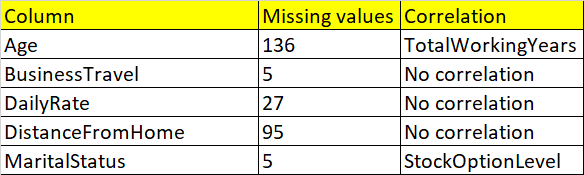

In [ ]:
#Imputing missing values in BusinessTravel.
print("Before Imputation:")
print(TrainData['BusinessTravel'].value_counts() )

#Iimputing Missing values in Marital Status using backfill method
TrainData['BusinessTravel'].fillna(method='bfill',inplace=True)

#Printing the number of missing values
print("\n")
print("Number of missing values after imputation:")
print(TrainData['BusinessTravel'].isna().sum())

print("\n")
print('After Imputation:')
print(TrainData['BusinessTravel'].value_counts() )

**Observation:**

We Observe that BusinessTravel field is not correlated with any column. Hence Imputing with bfill

In [ ]:
#Checking Median and mean for DailyRate
print("Before imputation:")
print("Mean for DailyRate",TrainData['DailyRate'].mean())
print("Median for DailyRate",TrainData['DailyRate'].median())

#Imputation for DailyRate
TrainData['DailyRate'].fillna(int(TrainData['DailyRate'].mean()), inplace=True)

print("\n")
print("After imputation:")
print("Mean for DailyRate",TrainData['DailyRate'].mean())
print("Median for DailyRate",TrainData['DailyRate'].median())

In [ ]:
#Checking Median and mean for DistanceFromHome
print("Before imputation:")
print("Mean for DistanceFromHome",TrainData['DistanceFromHome'].mean())
print("Median for DistanceFromHome",TrainData['DistanceFromHome'].median())

#Imputation for DailyRate
TrainData['DistanceFromHome'].fillna(int(TrainData['DistanceFromHome'].mean()), inplace=True)

print("\n")
print("After imputation:")
print("Mean for DistanceFromHome",TrainData['DistanceFromHome'].mean())
print("Median for DistanceFromHome",TrainData['DistanceFromHome'].median())

In [ ]:
#sorting the DF with Age and imputing missing values for Marital status since MaritalStatus is relatively dependent on Age
TrainData.sort_values(by='TotalWorkingYears',inplace=True)

#Iimputing Missing values in Marital Status using backfill method
TrainData['Age'].fillna(method='bfill',inplace=True)

#Printing the number of missing values
print("Number of missing values after imputation:\n")
print(TrainData['Age'].isna().sum())

In [ ]:
#cross tabulating since MaritalStatus and StockOptionLevel are highly correlated
pd.crosstab(TrainData['StockOptionLevel'],TrainData['MaritalStatus'],dropna=True)

**Observation:**

We noticed that MaritalStatus is highly correlated with StockOptionLevel. Hence Making a cross tabulation to check for imputation

In [ ]:
#Retriving the null values for MaritalStatus
#10,89,105,107,150
TrainData[TrainData['MaritalStatus'].isna()]

***Observation:***
The respective StockOptionLevel for null values of MaritalStatus are 1 and 2.

From Cross tabulation we noticed that


If StockOptionLevel =1 then Most of the Employees are Married

If StockOptionLevel =2 then Most of the Employees are Married


In [ ]:
TrainData['MaritalStatus'].mode()

**Observation:**

The most frequent occuring value is also married hence we can replace the null values with Mode

In [ ]:
 #Imputing Marital status column with mode 
 TrainData['MaritalStatus'].fillna(TrainData['MaritalStatus'].mode()[0], inplace=True)

**Observation:**

MaritalStatus is imputed as 'Married' as per the analysis

In [ ]:
# Checking Presence of null values after imputation is done
data=round(TrainData.isnull().sum(),2)
data

All the missing values are imputed. There are no missing values anymore

# **Week 3: Dimensionality Reduction:**

# ***Feature Engineering/ Feature Selection:***

We have already dropped EmployeeCount','Over18','StandardHours','EmployeeNumber' variables during EDA as they dont convey any information.

Department and JobRole are highly collineary. Hence we will try to retain one column and drop the other by doing feature engineering

In [ ]:
TrainDataImputed=TrainData.copy()

In [ ]:
#checking how many unique values are there in Department
deps=TrainData['Department'].unique()
deps

In [ ]:
#Displaying values in each department
deps=TrainData['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=TrainData.loc[TrainData['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

Manager is the common role in all the departments. Hence renaming Manager with respective Departments and Department column can be dropped

In [ ]:
#modifying the Manager role which is commong in all departments
TrainData.loc[(TrainData['Department']=='Research & Development') & (TrainData['JobRole']=='Manager'),'JobRole']='Research & Development_Manager'
TrainData.loc[(TrainData['Department']=='Sales') & (TrainData['JobRole']=='Manager'),'JobRole']='Sales_Manager'
TrainData.loc[(TrainData['Department']=='Human Resources') & (TrainData['JobRole']=='Manager'),'JobRole']='Human Resources_Manager'

In [ ]:
#displaying after update
deps=TrainData['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=TrainData.loc[TrainData['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

#droping deparment field
TrainData.drop('Department',axis=1,inplace=True)

Department column is dropped. Jobrole column is sufficient now

In [ ]:
TrainData.drop(['HourlyRate','MonthlyRate','TrainingTimesLastYear','PercentSalaryHike','YearsAtCompany','JobLevel'],axis=1,inplace=True)

From Bivariate analysis, we see there is no/least dependency of these variables on Attrition rate. Hence dropping these variables 

'HourlyRate','MonthlyRate','TrainingTimesLastYear','PercentSalaryHike','YearsAtCompany','JobLevel'

In [ ]:
#selecting only categorical variables for Label encoding
CatCol = TrainData.select_dtypes(include = "object").columns
print(CatCol)
#instantiating LabelEncoder() object
le = LabelEncoder()

#Label encoding the categorical columns by converting them into string type
for feat in CatCol:
    TrainData[feat] = le.fit_transform(TrainData[feat].astype(str))

In [ ]:
#combining MaritalStatus and StockOptionLevel into one column
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['MaritalStatus','StockOptionLevel']])
pca = PCA(n_components=1)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
data_transformed = pd.DataFrame(data_transformed, columns = ['Marital_stock'])
TrainData=pd.concat([TrainData,data_transformed],axis=1)

MaritalStatus and StockOptionLevel are correlated (0.7). 82% of variacne will be explained by the new column. Hence transforming it into a single column 'Marital_stock'


In [ ]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=5)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
print("Components:",pca.components_)
varianceRatio=pca.explained_variance_ratio_

80% of variance is explained by frist 2 components.

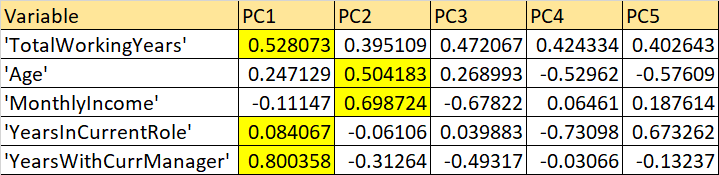

In [ ]:
sing_vals=[1,2,3,4,5]
plt.plot(sing_vals, varianceRatio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')

In [ ]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(TrainData[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(X_train_new)
data_transformed = pd.DataFrame(data_transformed, columns = ['Age&CompanyExp','ExperienceVsIncome'])
TrainData=pd.concat([TrainData,data_transformed],axis=1)

2 columns Age&CompanyExp','ExperienceVsIncome' are added here.

In [ ]:
TrainData.drop(['MaritalStatus','StockOptionLevel'],axis=1,inplace=True)
TrainData.drop(['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

Dropping the duplicate columns after transformation

In [ ]:
print(TrainData.shape)
TrainData.columns

In [ ]:
#Taking backup of imputed dataset
TrainDataImputed=TrainData.copy()

In [ ]:
#check the data after label encoding
TrainData.sort_index().head()

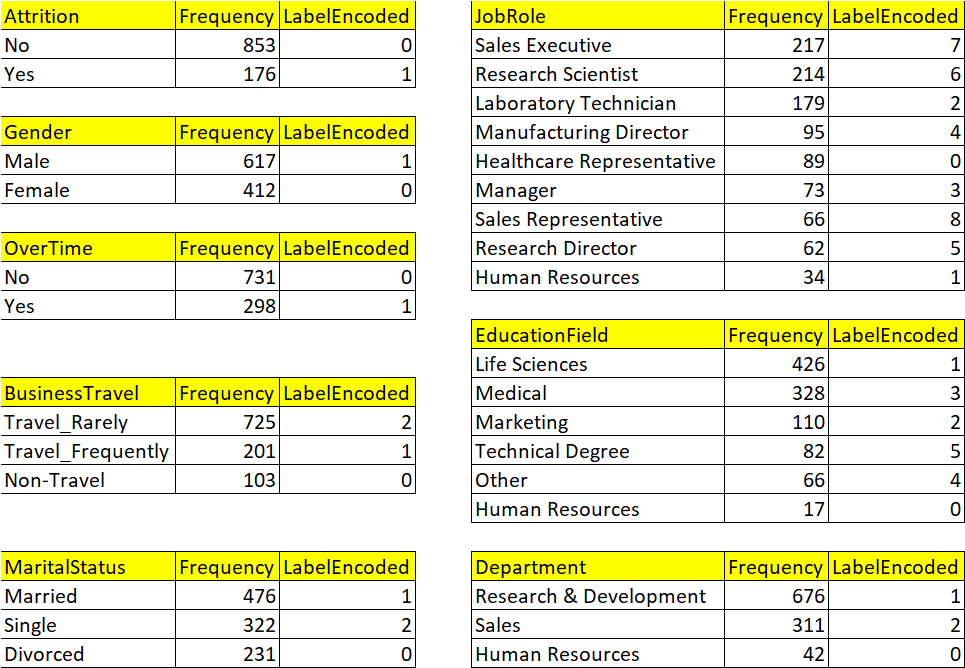

In [ ]:
#checking for presence onf multi-collieanrity
vif=pd.DataFrame()
vif['Features']=TrainData.columns
vif['VIF']=[variance_inflation_factor(TrainData.values,i) for i in range(TrainData.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Data still show multi collieanrity. 8 variables are having vif >5

In [ ]:
#plottting correlational plot checking Correlations and dependencies for imputation
plt.figure(figsize=(25,15))
sns.heatmap(round(TrainData.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

We dont see higher correlations now among the variables

# **Outliers Treatment:**

From our EDA, we got to know that Outliers are present in below columns 

We see there are outliers in below columns
1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked
8. MonthlyIncome

Capping these values with lower and upper bounds is suggested as we dont want to lose any data

In [ ]:
# OutliersData=TrainData[['YearsInCurrentRole','YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome', 'YearsWithCurrManager', 'NumCompaniesWorked', 'YearsSinceLastPromotion']].copy()
# print("Shape:",OutliersData.shape)
# OutliersCols=OutliersData.columns
# print("Columns are :\n",list(OutliersCols))
# OutliersData.sort_index(inplace=True)
# OutliersData.head()

In [ ]:
# fig, axes = plt.subplots(nrows=3,ncols=3)
# fig.set_size_inches(20, 20)
# a = sns.boxplot(data=OutliersData[['YearsInCurrentRole']] ,
#                 orient = "v" , ax=axes[0][0])
# b = sns.boxplot(data=OutliersData[['YearsAtCompany']] ,
#                 orient = "v" , ax=axes[0][1])
# c = sns.boxplot(data=OutliersData[['TotalWorkingYears']] ,
#                 orient = "v" , ax=axes[0][2])
# d = sns.boxplot(data=OutliersData[['MonthlyIncome']] ,
#                 orient = "v" , ax=axes[1][0])
# e = sns.boxplot(data=OutliersData[['YearsWithCurrManager']] ,
#                 orient = "v" , ax=axes[1][1])
# f = sns.boxplot(data=OutliersData[['NumCompaniesWorked']] ,
#                 orient = "v" , ax=axes[1][2])
# g = sns.boxplot(data=OutliersData[['YearsSinceLastPromotion']] ,
#                 orient = "v" , ax=axes[2][0])

In [ ]:
# def outlier (col):
#         sorted (col)
#         Q1, Q3 = col.quantile([0.25, 0.75])
#         IQR = Q3 - Q1
#         Lower_range = Q1 - (1.5 * IQR)
#         Upper_range = Q3 + (1.5 * IQR)
#         return Lower_range, Upper_range

In [ ]:
# for col in OutliersCols:
#   quartile_1, quartile_3 = np.percentile(OutliersData[col], [25, 75])
#   iqr_value = quartile_3 - quartile_1
#   lower_bound_val = quartile_1 - (1.5 * iqr_value)
#   upper_bound_val = quartile_3 + (1.5 * iqr_value)
#   print(col)
#   print("Lower bound:",lower_bound_val )
#   print("Upper bound:",upper_bound_val)
#   #print("Count of Outliers in lower bound {}". format(OutliersData[OutliersData[i]<lower_bound_val[i]][i].shape[0]))
#   #print("Count of Outliers in lower bound {}". format(OutliersData[OutliersData[i]>lower_bound_val[i]][i].shape[0]))
#   #OutliersData.loc[OutliersData[col]>upper_bound[col],col] = upper_bound_val[col]
#   #print("Number of Outliers in Lower Bound: {}". format(OutliersData[OutliersData[col]<lower_bound_val[col]]).shape[0])
#   #print("Number of Outliers in Upper Bound: {}". format(OutliersData[OutliersData[col]>upper_bound[col]][col].shape[0]))

In [ ]:
# Q1 = OutliersData.quantile(0.25)
# Q3 = OutliersData.quantile(0.75)
# IQR = Q3 - Q1

In [ ]:
# #Number of outliers present in each variable
# ((OutliersData < (Q1 - 1.5 * IQR)) | (OutliersData > (Q3 + 1.5 * IQR))).sum()

In [ ]:
#Percentage of outliers present in each variable
(((OutliersData < (Q1 - 1.5 * IQR)) | (OutliersData > (Q3 + 1.5 * IQR))).sum()/OutliersData.shape[0])*100

In [ ]:
# #Outlier treatment
# L, U = outlier(OutliersData['YearsInCurrentRole'])
# OutliersData['YearsInCurrentRole'] = np.where(OutliersData['YearsInCurrentRole'] > U, U, OutliersData['YearsInCurrentRole'])
# OutliersData['YearsInCurrentRole'] = np.where(OutliersData['YearsInCurrentRole'] < L, L, OutliersData['YearsInCurrentRole'])

# L, U = outlier(OutliersData['YearsAtCompany'])
# OutliersData['YearsAtCompany'] = np.where(OutliersData['YearsAtCompany'] > U, U, OutliersData['YearsAtCompany'])
# OutliersData['YearsAtCompany'] = np.where(OutliersData['YearsAtCompany'] < L, L, OutliersData['YearsAtCompany'])

# L, U = outlier(OutliersData['TotalWorkingYears'])
# OutliersData['TotalWorkingYears'] = np.where(OutliersData['TotalWorkingYears'] > U, U, OutliersData['TotalWorkingYears'])
# OutliersData['TotalWorkingYears'] = np.where(OutliersData['TotalWorkingYears'] < L, L, OutliersData['TotalWorkingYears'])

# L, U = outlier(OutliersData['MonthlyIncome'])
# OutliersData['MonthlyIncome'] = np.where(OutliersData['MonthlyIncome'] > U, U, OutliersData['MonthlyIncome'])
# OutliersData['MonthlyIncome'] = np.where(OutliersData['MonthlyIncome'] < L, L, OutliersData['MonthlyIncome'])

# L, U = outlier(OutliersData['YearsWithCurrManager'])
# OutliersData['YearsWithCurrManager'] = np.where(OutliersData['YearsWithCurrManager'] > U, U, OutliersData['YearsWithCurrManager'])
# OutliersData['YearsWithCurrManager'] = np.where(OutliersData['YearsWithCurrManager'] < L, L, OutliersData['YearsWithCurrManager'])

# L, U = outlier(OutliersData['NumCompaniesWorked'])
# OutliersData['NumCompaniesWorked'] = np.where(OutliersData['NumCompaniesWorked'] > U, U, OutliersData['NumCompaniesWorked'])
# OutliersData['NumCompaniesWorked'] = np.where(OutliersData['NumCompaniesWorked'] < L, L, OutliersData['NumCompaniesWorked'])

# L, U = outlier(OutliersData['YearsSinceLastPromotion'])
# OutliersData['YearsSinceLastPromotion'] = np.where(OutliersData['YearsSinceLastPromotion'] > U, U, OutliersData['YearsSinceLastPromotion'])
# OutliersData['YearsSinceLastPromotion'] = np.where(OutliersData['YearsSinceLastPromotion'] < L, L, OutliersData['YearsSinceLastPromotion'])

In [ ]:
# fig, axes = plt.subplots(nrows=3,ncols=3)
# fig.set_size_inches(20, 20)
# a = sns.boxplot(data=OutliersData[['YearsInCurrentRole']] ,
#                 orient = "v" , ax=axes[0][0])
# b = sns.boxplot(data=OutliersData[['YearsAtCompany']] ,
#                 orient = "v" , ax=axes[0][1])
# c = sns.boxplot(data=OutliersData[['TotalWorkingYears']] ,
#                 orient = "v" , ax=axes[0][2])
# d = sns.boxplot(data=OutliersData[['MonthlyIncome']] ,
#                 orient = "v" , ax=axes[1][0])
# e = sns.boxplot(data=OutliersData[['YearsWithCurrManager']] ,
#                 orient = "v" , ax=axes[1][1])
# f = sns.boxplot(data=OutliersData[['NumCompaniesWorked']] ,
#                 orient = "v" , ax=axes[1][2])
# g = sns.boxplot(data=OutliersData[['YearsSinceLastPromotion']] ,
#                 orient = "v" , ax=axes[2][0])

# **Model Building**

# **Logistic Regression:**

In [ ]:
#taking backup of data to create models without treating outliers
TrainLogisticOL=TrainData.copy()
TrainLogisticOL.shape

In [ ]:
TrainLogisticOL.head()

In [ ]:
#TrainLogisticOL.drop (['PercentSalaryHike','TrainingTimesLastYear','HourlyRate','MonthlyRate'],axis=1,inplace=True)

In [ ]:
#Setting the target and independent variables
y = TrainLogisticOL.pop('Attrition')
X=TrainLogisticOL

Since we are tring to predict attrition, we have it in y variable and other columns in X 


In [ ]:
TrainLogisticOL.sort_index(inplace=True)
TrainLogisticOL.head()

In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=23)

In [ ]:
# checking the spread of overall split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

In [ ]:
#checking the split wrt to attrition
print("Attrtion from TrainDataset\n",y_train.value_counts())
print("\n")
print("Attrtion from TestDataSet\n",y_test.value_counts())

In [ ]:
print("Train data Split proportion:\n")
print(round(y_train[y_train==1].value_counts()/y_train.shape[0],2))
print(round(y_train[y_train==0].value_counts()/y_train.shape[0],2))
print("\n")
print("Test data Split proportion:\n")
print(round(y_test[y_test==1].value_counts()/y_test.shape[0],2))
print(round(y_test[y_test==0].value_counts()/y_test.shape[0],2))

***Building model without hyper parameters tuning:***

In [ ]:
#Creating Logistic regression object
LosgisticWeights={0:0.3, 1:0.8}
logModel = LogisticRegression(max_iter=1000,class_weight=LosgisticWeights)

In [ ]:
#Fitting the model on Train data
logModel.fit(X_train, y_train)

In [ ]:
#Using LR model to predict on test data
y_pred = logModel.predict(X_test)

In [ ]:
#creating confusion matrix for checking performance
print(confusion_matrix(y_test, y_pred))

In [ ]:
#printing various metrics.
print(classification_report( y_test, y_pred))

Accuracy is 81%, but recall and precision is just 59% and 46 %

***Observation:***

Our main objective is to predict the number of employees who are actually leaving. Here we made 47 wrong predictions that employees will not attritie but they actually were subjected to attrition. This is Type-I error and it cause great damage to company. This should be improved.

**Metrics:**

1. Precision= TP/(TP+FP)

2. **Recall/Sensitivity=TP/(TP+FN)**

3. f1-score= 2*((precision*recall)/(precision+recall))

4. Specificity=TN/(TN+FP)

5. Accuracy=(TN+TP)/(TN+TP+FN+FP)

***Randomized search for Logistic Regresssion hyper tuning parameters:***

In [ ]:
weights=np.linspace(0.1,1,20)
weights

In [ ]:
np.logspace(-4, 4, 20)

In [ ]:
#setting multiple parameters for randomizedGrid search
param_grid = [    
    {# l1, l2, elasticnet(combination of l1,l2) and none- these are the penalty parameters for regularisation
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],#no.of iterations
     'class_weight': [{0: x, 1: 1-x} for x in weights]
    }
]

In [ ]:
#Instantiating RandomizedGridSearch Object with Logistic regression model object
randomSearch = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
#Control hyper tuning parameters for RandomSearch
bestRandom = randomSearch.fit(X_train,y_train)

In [ ]:
#Displaying the best estimators
bestRandom.best_estimator_

In [ ]:
#Using LR model to predict on test data
y_pred = bestRandom.best_estimator_.predict(X_test)

In [ ]:
#using RandomSearchGrid
print(confusion_matrix(y_test, y_pred))

We are not abel to find out employees who are actually contributing to attrition

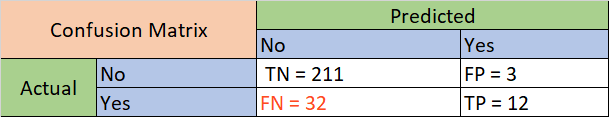

In [ ]:
print(classification_report(y_test, y_pred))

***Hypertuning the parameters with GridSearch:***

In [ ]:
weights=np.linspace(0.1,1,10)
weights

In [ ]:
#setting multiple parameters for randomizedGrid search
param_grid_cv = [    
    {# l1, l2, elasticnet(combination of l1,l2) and none- these are the penalty parameters for regularisation
     'penalty' : ['l1'],
   # 'C' : np.logspace(3, 10, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [300],#no.of iterations
     'class_weight': [{0: x, 1: 1-x} for x in weights]
    }
]

In [ ]:
#searching the grid for best hyper parameters
gridSearch = GridSearchCV(logModel, param_grid= param_grid_cv, cv = 2, verbose=True, n_jobs=-1)

In [ ]:
#Fitting the gridsearch parameters for logistic model
bestGrid = gridSearch.fit(X_train, y_train)

In [ ]:
#displaying the best parameters for gridsearch
bestGrid.best_estimator_

In [ ]:
#predicting on the test dataset
y_pred = bestGrid.best_estimator_.predict(X_test)

In [ ]:
#validating performance with confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
#displaying the classification report
print(classification_report(y_test, y_pred))

Below are the metrics

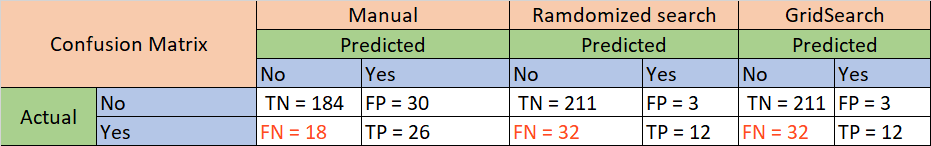

# **Decision Trees:**

In [ ]:
#taking backup of data to create decision tree models without treating outliers
TrainDecisionTreeOL=TrainData.copy()

In [ ]:
#TrainDecisionTreeOL['Attrition']=TrainDecisionTreeOL['Attrition'].astype('object')

In [ ]:
#Setting the target and independent variables
y = TrainDecisionTreeOL.pop('Attrition')
X=TrainDecisionTreeOL

***Buidling without hypertuning:***

In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=23)

In [ ]:
print("Train data Split proportion:\n")
print(round(y_train[y_train==1].value_counts()/y_train.shape[0],2))
print(round(y_train[y_train==0].value_counts()/y_train.shape[0],2))
print("\n")
print("Test data Split proportion:\n")
print(round(y_test[y_test==1].value_counts()/y_test.shape[0],2))
print(round(y_test[y_test==0].value_counts()/y_test.shape[0],2))

In [ ]:
# checking the spread of split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

In [ ]:
#instantiating DecissionTree classifier and fitting the model on the train data
decisionTree = DecisionTreeClassifier(class_weight='balanced')
decisionTree.fit(X_train, y_train)

In [ ]:
#Using the model to predict on test data
y_pred_dt = decisionTree.predict(X_test)

In [ ]:
#model with manual parameters
print(confusion_matrix(y_test, y_pred_dt))

In [ ]:
print(classification_report(y_test, y_pred_dt))

In [ ]:
param_grid_random = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : [int(x) for x in np.linspace(4, 20, num = 2)],
     'min_samples_split' : [50,100,150,200],
     'min_samples_leaf' : [50,100,150,200],
     'max_features' : list(range(1,X_train.shape[1])),
    }
]

In [ ]:
randomSearch = RandomizedSearchCV(decisionTree, param_distributions = param_grid_random, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
randomSearch.fit(X_train, y_train)

In [ ]:
y_predRandom = randomSearch.best_estimator_.predict(X_test)

In [ ]:
randomSearch.best_estimator_

In [ ]:
#model with random search
print(confusion_matrix(y_test, y_predRandom))

In [ ]:
print(classification_report(y_test, y_predRandom))

***GridSearch Hypertuning for DecisionTrees:***

In [ ]:
param_grid_cv = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : np.linspace(4, 15, 10, endpoint=True),
     'min_samples_split' : [150,200,250],
     'min_samples_leaf' : [50,150,200],
     'max_features' : list(range(1,X_train.shape[1])),
    }
]

In [ ]:
gridSearchDT = GridSearchCV(decisionTree, param_grid= param_grid_cv, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
gridSearchDT.fit(X_train, y_train)

In [ ]:
y_pred = gridSearchDT.best_estimator_.predict(X_test)

In [ ]:
#model with gridsearch
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# **Random Forest:**

In [ ]:
TrainData.head()

In [ ]:
#taking backup of data to create decision tree models without treating outliers
TrainRandomForest=TrainData.copy()

In [ ]:
#Setting the target and independent variables
y = TrainRandomForest.pop('Attrition')
X=TrainRandomForest

In [ ]:
#Splitting into
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

In [ ]:
# checking the spread of split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

In [ ]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30,stratify=y ,random_state=1)

In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

In [ ]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0,class_weight='balanced')
rfcl = rfcl.fit(X_train, train_labels)

In [ ]:
rfcl

In [ ]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [ ]:
estimator = rfcl.estimators_[5]


In [ ]:
TrainRandomForest.columns

In [ ]:
target_list = []
for i in y.unique():
  target_list.append(str(i))

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = TrainRandomForest.columns,
                class_names = target_list,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Splitting into
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

In [ ]:
rf_model = RandomForestClassifier(random_state = 23,class_weight='balanced')

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
#manual model without hypertuning
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
param_grid_random = [
  {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(4, 20, num = 2)],
    'min_samples_split': [50,100,150,200],
    'min_samples_leaf': [100,200,300],
    'bootstrap': [True, False]}
]

In [ ]:
rf_model_random = RandomizedSearchCV(rf_model, param_distributions = param_grid_random, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
rf_model_random.fit(X_train, y_train)

In [ ]:
rf_model_random.best_estimator_

In [ ]:
y_pred = rf_model_random.best_estimator_.predict(X_test)

In [ ]:
#mode wil randomgrid search
print(confusion_matrix(y_test, y_pred))

In [ ]:
param_grid_cv = [    
    {'n_estimators': [200,300,500],
    'max_depth': [int(x) for x in np.linspace(10, 30, num = 5)],
    'min_samples_split': [20,30,40],
    #'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False]
    }
]

In [ ]:
rf_model_grid = GridSearchCV(rf_model, param_grid= param_grid_cv, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
rf_model_grid.fit(X_train, y_train)

In [ ]:
rf_model_grid.best_estimator_

In [ ]:
y_pred = rf_model_grid.best_estimator_.predict(X_test)

In [ ]:
#mode wil grid search
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# **XGBoost**

In [ ]:
#taking backup of data to create models without treating outliers
TrainBoost=TrainData.copy()

In [ ]:
#Setting the target and independent variables
y = TrainBoost.pop('Attrition')
X=TrainBoost

In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=23)

In [ ]:
#instantiating XGboost
classifier=xgboost.XGBClassifier()

In [ ]:
#fitting the model
classifier.fit(X_train, y_train)

#making prediction on train and test
y_pred_train=classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Classification Report
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, classifier.predict(X_train)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, classifier.predict(X_test)),'\n')

In [ ]:
#confusion matrix for both train and test
print(confusion_matrix(y_pred_train,y_train))
print(confusion_matrix(y_pred,y_test))

In [ ]:
#
print(classification_report( y_pred_train,y_train))
print(classification_report(y_pred, y_test ))

In [ ]:
param_grid = [    
    {
    "learning_rate"    : [0.01,0.02,0.03 ] ,
    "max_depth"        : [ 6,8,10],
    "min_child_weight" : [ 0,1 ],
    "gamma"            : [ 0,1,5 ],
     "subsample"       : [0.5,0.7,0.9,1.0],
    "colsample_bytree" : [ 0.5,0.7,0.9,1 ],
     "scale_pos_weight": [1,2 ]
    }
]

In [ ]:
clf_random = RandomizedSearchCV(classifier, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf_random = clf_random.fit(X_train,y_train)

In [ ]:
best_clf_random.best_estimator_

In [ ]:
y_pred_train=best_clf_random.best_estimator_.predict(X_train)
y_pred = best_clf_random.best_estimator_.predict(X_test)

print(confusion_matrix(y_pred_train,y_train))
print(confusion_matrix(y_pred,y_test ))

In [ ]:
print(classification_report( y_pred_train,y_train))
print(classification_report(y_pred, y_test ))

In [ ]:
param_grid = [    
    {
    "learning_rate"    : [0.01,0.02,0.03 ] ,
    "max_depth"        : [ 6,8,10],
    "min_child_weight" : [ 0,1 ],
    "gamma"            : [ 0,1,5 ],
     "subsample"       : [0.6,0.7,0.8],
    "colsample_bytree" : [0.3 ,0.4,0.5],
     "scale_pos_weight": [1,2,3 ]
    }
]

In [ ]:
clf_grid = GridSearchCV(classifier, param_grid= param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf_grid = clf_grid.fit(X_train,y_train)

In [ ]:
best_clf_grid.best_estimator_

In [ ]:
y_pred = best_clf_grid.best_estimator_.predict(X_test)

In [ ]:
y_pred_train=best_clf_random.best_estimator_.predict(X_train)
y_pred = best_clf_random.best_estimator_.predict(X_test)

print(confusion_matrix(y_pred_train,y_train))
print(confusion_matrix(y_pred,y_test ))

In [ ]:
print(classification_report( y_pred_train,y_train))
print(classification_report(y_pred, y_test ))

# **NaiveBayes**

In [ ]:
#taking backup of data to create models without treating outliers
TrainNB=TrainData.copy()
TrainNB.shape

In [ ]:
#separating X and Y
X = TrainNB.drop('Attrition',axis=1)
y = TrainNB['Attrition']

In [ ]:
# Splitting the data into training and test data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 1,stratify=y)

In [ ]:
# Importing the model and fitting the training data
model = GaussianNB()
model.fit(X_train , y_train)

In [ ]:
# Accuracy score for the training data
model.score(X_train,y_train)

In [ ]:
# Predicting the Attrition for training and test data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
# Confusion Matrix for training data
print(confusion_matrix(pred_train,y_train))
print(classification_report(pred_train,y_train))

In [ ]:
# Confusion Matrix for test data
print(confusion_matrix(pred_test,y_test))
print(classification_report(pred_test,y_test))

f1-score is low for the minority class.

# **SVM**

In [ ]:
#taking backup of data to create models without treating outliers
TrainSVM=TrainData.copy()

In [ ]:
#separating X and Y
X = TrainSVM.drop('Attrition',axis=1)
y = TrainSVM['Attrition']

In [ ]:
# Splitting the data into training and test data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 354)

# define model
weights = {0:0.4, 1:0.6}

In [ ]:
# Building base Model
SVM = svm.SVC(kernel='poly', C=1,random_state=354).fit(X_train, y_train)

In [ ]:
SVM_param_random = {'C': [1,2],
              'gamma': [ 0.1,0.2,0.3], 
              'kernel': ['rbf']} ,

SVM_random = RandomizedSearchCV(SVM, param_distributions = SVM_param_random, cv = 3, n_jobs=-1,verbose=True)

In [ ]:
SVM_random.fit(X_train, y_train)

In [ ]:
SVM_random.best_estimator_

In [ ]:
# Predicting the Attrition for training and test data
pred_train = SVM_random.predict(X_train)
pred_test = SVM_random.predict(X_test)
# Confusion Matrix for training data
print(confusion_matrix(pred_train,y_train))
print(classification_report(pred_train,y_train))

In [ ]:
# Confusion Matrix for test data
print(confusion_matrix(pred_test,y_test))
print(classification_report(pred_test,y_test))